In [1]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
sys.path.append('../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
import traceback
from itertools import product
from brokenaxes import brokenaxes
import pingouin as pg
import colorsys

stim25sdecodingfilename = 'D:\\stimdecoding_25s.csv'
passivedecodingfilename = 'D:\\stimdecoding_25s_passive.csv'
choicedecodingfilename = 'D:\\choicedecoding.csv'

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = '#ff3654'
NONTARGET_COLOR = '#5776ff'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
LASER_COLOR = '#3375E9'
GOOD_GREY = '#969696'
GOOD_GREEN = '#32A852'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']#,'#6ded94','#50d979','#36bf5f']
STIM_COLOR = '#E8CA17'
CHOICE_COLOR = '#9DE817'

dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28']

retroanimals = ['PB_86','BS_86','PB_92','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165']
did_learn = ['BS_92','BS_103','BS_111','BS_179']
did_not_learn = ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174']
indeterminate = ['BS_139','BS_165','BS_191','BS_192']

dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']#,'DS_15','DS_19']
opsinanimalnames = ['BS_86','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165','BS_174','BS_179','BS_191','BS_192']
tuninganimalnames = ['BS_173','BS_175','BS_187','BS_188','BS_213','BS_214','TH_217','AE_235','AE_236','TH_237']
unuseddualanimals = ['BS_78']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28','DS_16','DS_17','DS_22','DS_13','DS_23']

#act_directory = 'D:\\Analysis_Cache_archived_Oct_27_2022'
act_directory = 'D:\\Analysis_Cache'
ops_directory = 'D:\\Opsin_Cache'
beh_directory = 'P:\\Behavioor'

stim25sdecodingfilename = 'D:\\stimdecoding_25s.csv'
stim25sopsinondecodingfilename = 'D:\\stimdecoding_25s_opsin_on.csv'
stim25sopsinoffdecodingfilename = 'D:\\stimdecoding_25s_opsin_off.csv'

current_version = 0 #June 22nd, 2023
current_version = 1 #June 22nd, 2023
current_version = 2 #August 12th, 2023
current_version = 3 #Nov 6th, 2023
current_version = 4 #April 5th, 2024

stdfont = 14
stdyfrac = 0.06

# Load Data

In [2]:
animals = np.concatenate((dualanimalnames,['DS_15','DS_19']))

In [3]:
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70


C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Fetching files for BS_72
Fetching files for BS_83
Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching files for DS_16
Fetching files for DS_17
Fetching files for DS_19
Fetching files for DS_22
Fetching files for DS_23
Fetching files for DS_24
Fetching files for DS_27
Fetching files for DS_28
Fetching files for DS_13
Fetching files for BS_173
Fetching files for BS_175
Fetching files for BS_187
Fetching files for BS_188
Fetching files for BS_213
Fetching files for BS_214
Fetching files for TH_217
Fetching files for AE_235
Fetching files for AE_236
Fetching files for TH_237
Fetching files for AE_252
Fetching files for AE_254
Fetching files for AE_238
Fetching files for AE_239
Fetching files for AE_240
Fetching files for AE_267
Fetching files for AO_273
Fetching files for AO_274
Fetching files for AE_287
Fetching files for AE_301
Fetching files for AE_312
P:\Behavioor\BS_61\behavior\BS_61_42v2_reversal.txt: 

../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scala

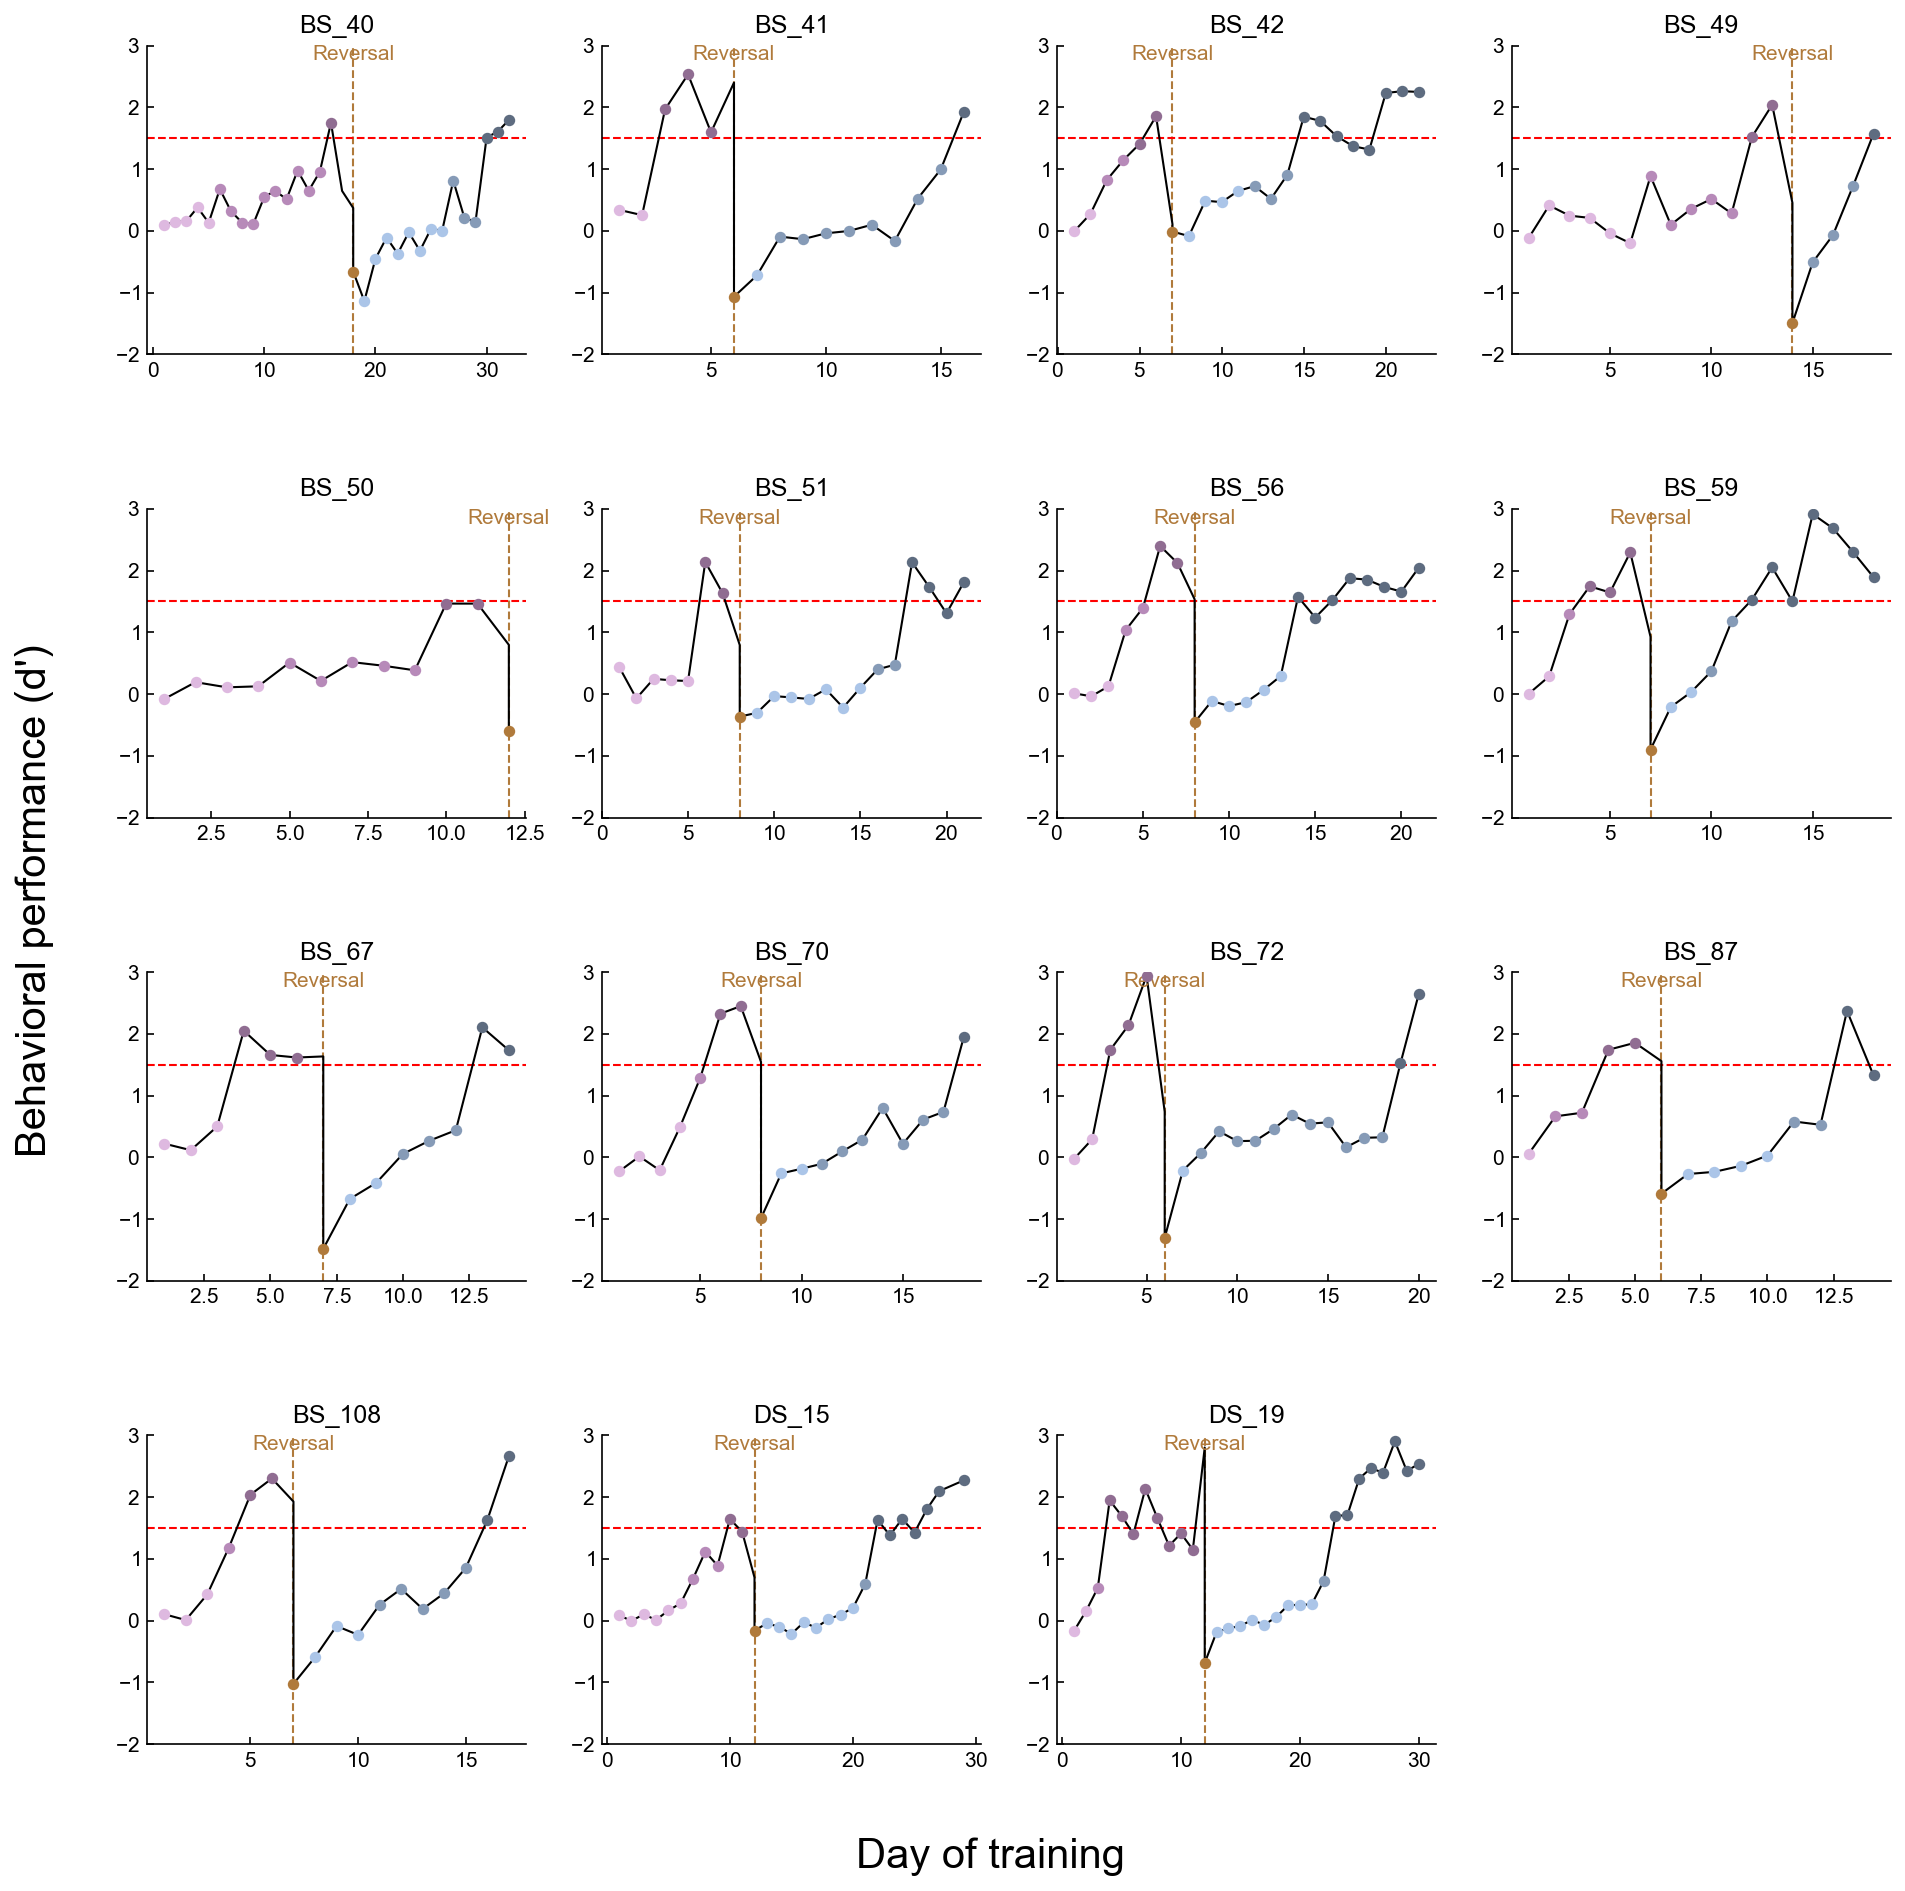

In [4]:
learning_phases,_,_ = ilep.calculateLearningPhasesV2(animals,animalBehaviors,plot=True)
#plt.savefig(os.path.join('D:\\\\TempFigures','All ephys animals learning phases.pdf'),transparent=False,facecolor="white")

In [5]:
EnumSession = []
EnumClust = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task in ['passive no beahvior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in animals:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSession.append(session)
        EnumClust.append(clust)

100%|██████████| 740/740 [00:08<00:00, 91.04it/s] 


In [6]:
EILphases = np.full_like(EnumSession,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSession)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch','opto switch','tuning switch']:
            EILphases[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphases[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphases[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphases[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_early_days:
            EILphases[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_late_days:
            EILphases[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_expert_days:
            EILphases[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 1829/1829 [00:28<00:00, 65.29it/s] 

errors for: []


# Load Decoding Data

In [7]:
stim_25s_df = pd.read_csv(stim25sdecodingfilename)
passive_df = pd.read_csv(passivedecodingfilename)
choice_df = pd.read_csv(choicedecodingfilename)
dec_df = pd.concat([stim_25s_df,choice_df,passive_df])

def getDataPoint(df,session,clust,categories,column):
    df = df[df['session']==session]
    df = df[df['clust']==clust]
    df = df[df['categories']==categories]
    val = list(df[column])
    if len(val) == 1:
        return val[0]
    elif len(val) <= 0:
        return np.nan
    else:
        raise Exception('Incorrent length. Duplicate values')

In [15]:
FRmod_preearly = []
FRmod_prelate = []
FRmod_preexpert = []
FRmod_postearly = []
FRmod_postlate = []
FRmod_postexpert = []

ChoiceMod_preearly = []
ChoiceMod_prelate = []
ChoiceMod_preexpert = []
ChoiceMod_postearly = []
ChoiceMod_postlate = []
ChoiceMod_postexpert = []

Stim_Dec_preearly = []
Stim_Dec_prelate = []
Stim_Dec_preexpert = []
Stim_Dec_postearly = []
Stim_Dec_postlate = []
Stim_Dec_postexpert = []

Choice_Dec_preearly = []
Choice_Dec_prelate = []
Choice_Dec_preexpert = []
Choice_Dec_postearly = []
Choice_Dec_postlate = []
Choice_Dec_postexpert = []

Control_Stim_Dec_preearly = []
Control_Stim_Dec_prelate = []
Control_Stim_Dec_preexpert = []
Control_Stim_Dec_postearly = []
Control_Stim_Dec_postlate = []
Control_Stim_Dec_postexpert = []

Control_Choice_Dec_preearly = []
Control_Choice_Dec_prelate = []
Control_Choice_Dec_preexpert = []
Control_Choice_Dec_postearly = []
Control_Choice_Dec_postlate = []
Control_Choice_Dec_postexpert = []

num_controlnan = 0

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if EILphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
    
    try:
        FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
    except Exception as e:
        print(e)
        FRmod = np.nan
    try:
        ChoiceMod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation_choice
    except Exception as e:
        print(e)
        ChoieMod = np.nan
        
    if np.isnan(FRmod):
        continue
    if np.isnan(ChoiceMod):
        continue
    
    stim_acc = getDataPoint(dec_df,session,clust,'stimulus','weighted_accuracy')
    choice_acc = getDataPoint(dec_df,session,clust,'response','weighted_accuracy')
    stim_acc_control = getDataPoint(dec_df,session,clust,'stimulus','synthetic_control_weighted_accuracy')
    choice_acc_control = getDataPoint(dec_df,session,clust,'response','synthetic_control_weighted_accuracy')
    if np.isnan(choice_acc_control):
        num_controlnan += 1
        continue
    
    if getDataPoint(dec_df,session,clust,'stimulus','pval_synthetic_control') > 0.05:
        stim_acc = np.nan
    if getDataPoint(dec_df,session,clust,'response','pval_synthetic_control') > 0.05:
        choice_acc = np.nan

    
    if EILphases[idx] == 'pre early':
        FRmod_preearly.append(FRmod)
        ChoiceMod_preearly.append(ChoiceMod)
        Stim_Dec_preearly.append(stim_acc)
        Choice_Dec_preearly.append(choice_acc)
        Control_Stim_Dec_preearly.append(stim_acc_control)
        Control_Choice_Dec_preearly.append(choice_acc_control)
    elif EILphases[idx] == 'pre late':
        FRmod_prelate.append(FRmod)
        ChoiceMod_prelate.append(ChoiceMod)
        Stim_Dec_prelate.append(stim_acc)
        Choice_Dec_prelate.append(choice_acc)
        Control_Stim_Dec_prelate.append(stim_acc_control)
        Control_Choice_Dec_prelate.append(choice_acc_control)
    elif EILphases[idx] == 'pre expert':
        FRmod_preexpert.append(FRmod)
        ChoiceMod_preexpert.append(ChoiceMod)
        Stim_Dec_preexpert.append(stim_acc)
        Choice_Dec_preexpert.append(choice_acc)
        Control_Stim_Dec_preexpert.append(stim_acc_control)
        Control_Choice_Dec_preexpert.append(choice_acc_control)
    elif EILphases[idx] == 'post early':
        FRmod_postearly.append(FRmod)
        ChoiceMod_postearly.append(ChoiceMod)
        Stim_Dec_postearly.append(stim_acc)
        Choice_Dec_postearly.append(choice_acc)
        Control_Stim_Dec_postearly.append(stim_acc_control)
        Control_Choice_Dec_postearly.append(choice_acc_control)
    elif EILphases[idx] == 'post late':
        FRmod_postlate.append(FRmod)
        ChoiceMod_postlate.append(ChoiceMod)
        Stim_Dec_postlate.append(stim_acc)
        Choice_Dec_postlate.append(choice_acc)
        Control_Stim_Dec_postlate.append(stim_acc_control)
        Control_Choice_Dec_postlate.append(choice_acc_control)
    elif EILphases[idx] == 'post expert':
        FRmod_postexpert.append(FRmod)
        ChoiceMod_postexpert.append(ChoiceMod)
        Stim_Dec_postexpert.append(stim_acc)
        Choice_Dec_postexpert.append(choice_acc)
        Control_Stim_Dec_postexpert.append(stim_acc_control)
        Control_Choice_Dec_postexpert.append(choice_acc_control)
        
FRmod_preearly = np.array(FRmod_preearly)
FRmod_prelate = np.array(FRmod_prelate)
FRmod_preexpert = np.array(FRmod_preexpert)
FRmod_postearly = np.array(FRmod_postearly)
FRmod_postlate = np.array(FRmod_postlate)
FRmod_postexpert = np.array(FRmod_postexpert)

ChoiceMod_preearly = np.array(ChoiceMod_preearly)
ChoiceMod_prelate = np.array(ChoiceMod_prelate)
ChoiceMod_preexpert = np.array(ChoiceMod_preexpert)
ChoiceMod_postearly = np.array(ChoiceMod_postearly)
ChoiceMod_postlate = np.array(ChoiceMod_postlate)
ChoiceMod_postexpert = np.array(ChoiceMod_postexpert)

Stim_Dec_preearly = np.array(Stim_Dec_preearly)
Stim_Dec_prelate = np.array(Stim_Dec_prelate)
Stim_Dec_preexpert = np.array(Stim_Dec_preexpert)
Stim_Dec_postearly = np.array(Stim_Dec_postearly)
Stim_Dec_postlate = np.array(Stim_Dec_postlate)
Stim_Dec_postexpert = np.array(Stim_Dec_postexpert)

Choice_Dec_preearly = np.array(Choice_Dec_preearly)
Choice_Dec_prelate = np.array(Choice_Dec_prelate)
Choice_Dec_preexpert = np.array(Choice_Dec_preexpert)
Choice_Dec_postearly = np.array(Choice_Dec_postearly)
Choice_Dec_postlate = np.array(Choice_Dec_postlate)
Choice_Dec_postexpert = np.array(Choice_Dec_postexpert)

Control_Stim_Dec_preearly = np.array(Control_Stim_Dec_preearly)
Control_Stim_Dec_prelate = np.array(Control_Stim_Dec_prelate)
Control_Stim_Dec_preexpert = np.array(Control_Stim_Dec_preexpert)
Control_Stim_Dec_postearly = np.array(Control_Stim_Dec_postearly)
Control_Stim_Dec_postlate = np.array(Control_Stim_Dec_postlate)
Control_Stim_Dec_postexpert = np.array(Control_Stim_Dec_postexpert)

Control_Choice_Dec_preearly = np.array(Control_Choice_Dec_preearly)
Control_Choice_Dec_prelate = np.array(Control_Choice_Dec_prelate)
Control_Choice_Dec_preexpert = np.array(Control_Choice_Dec_preexpert)
Control_Choice_Dec_postearly = np.array(Control_Choice_Dec_postearly)
Control_Choice_Dec_postlate = np.array(Control_Choice_Dec_postlate)
Control_Choice_Dec_postexpert = np.array(Control_Choice_Dec_postexpert)

1389it [00:29, 47.58it/s]

'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'


1395it [00:29, 49.86it/s]

'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'


1414it [00:30, 51.45it/s]

'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'


1829it [00:37, 49.02it/s] 


In [23]:
num_controlnan

677

In [24]:
677+700

1377

# V2

## Stimulus

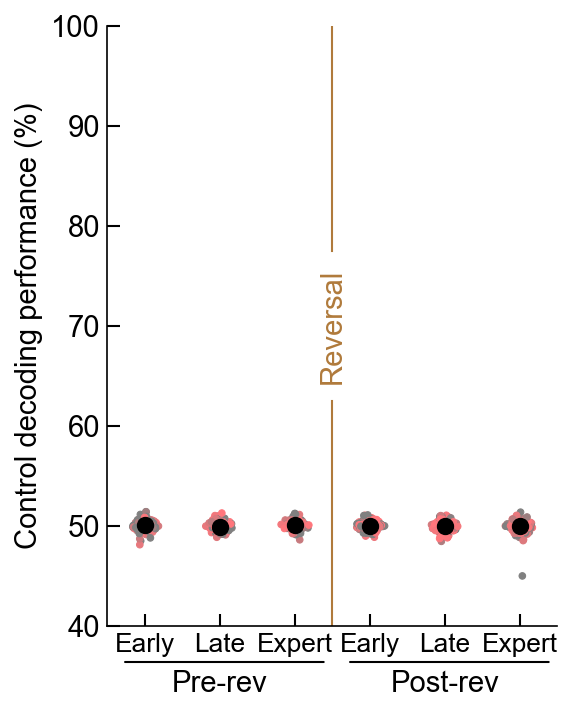

In [9]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3, 4, left=.3, bottom=.3, right=0, top=0)

################################################################################################################

size=10

data = [Control_Stim_Dec_preearly,Control_Stim_Dec_prelate,Control_Stim_Dec_preexpert,Control_Stim_Dec_postearly,Control_Stim_Dec_postlate,Control_Stim_Dec_postexpert]
FRmoddata = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
labels = ['Control','Early','Late','Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.4,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.4,minjitter=0.075)
colors = NCR_CR_cmap((np.concatenate(FRmoddata)-1)/5)

ax.scatter(X, Y, s=size, ec=colors, fc=colors, lw=0.5,zorder=-10)


#Plot summary
for idx,column in enumerate(data):
    column = ilep.rmnan(column)
    eye_color=GOOD_GREY#NCR_CR_cmap((percentCR-40)/20)
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    #border_color=colorsys.hls_to_rgb(h,l*0.5,s)
    border_color=colorsys.hls_to_rgb(h,l,s)
    
    border_color = 'k'
    eye_color = 'k'

    summary_size=50
    summary_width=1.25
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    
    ax.scatter([idx], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')

################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_ylim([0.4,1])
ax.set_yticks([0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_yticklabels(['40','50','60','70','80','90','100'])
ylab = ax.set_ylabel('Control decoding performance (%)')

ax.set_xlim([-0.5,5.5])
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre-rev', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post-rev', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Stimulus control decoding performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [10]:
data_dec = SimpleNamespace()
data_dec.preearly = Control_Stim_Dec_preearly
data_dec.prelate = Control_Stim_Dec_prelate
data_dec.preexpert = Control_Stim_Dec_preexpert
data_dec.postearly = Control_Stim_Dec_postearly
data_dec.postlate = Control_Stim_Dec_postlate
data_dec.postexpert = Control_Stim_Dec_postexpert
ilep.mannwhitneycompareall(data_dec)
pass

pre-early   n = 140
pre-late    n = 181
pre-expert  n = 84
post-early  n = 296
post-late   n = 336
post-expert n = 163
pre-early  to pre-late   : 0.13155203275880692
pre-late   to pre-expert : 0.24504943291294012
pre-early  to pre-expert : 0.938001330970034
post-early to post-late  : 0.13155203275880692
post-late  to post-expert: 0.938001330970034
post-early to post-expert: 0.3682028297560602


In [11]:
print(len(Control_Stim_Dec_preearly))
print(len(Control_Stim_Dec_prelate))
print(len(Control_Stim_Dec_preexpert))
print(len(Control_Stim_Dec_postearly))
print(len(Control_Stim_Dec_postlate))
print(len(Control_Stim_Dec_postexpert))

148
188
117
306
342
262


In [13]:
148+188+117+306+342+262

1363

## Choice

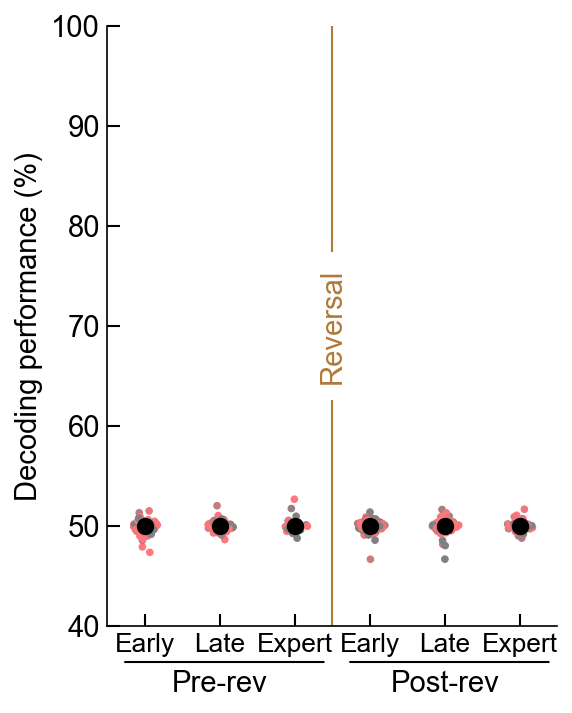

In [20]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3, 4, left=.3, bottom=.3, right=0, top=0)

################################################################################################################

size=10

data = [Control_Choice_Dec_preearly,Control_Choice_Dec_prelate,Control_Choice_Dec_preexpert,Control_Choice_Dec_postearly,Control_Choice_Dec_postlate,Control_Choice_Dec_postexpert]
FRmoddata = [ChoiceMod_preearly,ChoiceMod_prelate,ChoiceMod_preexpert,ChoiceMod_postearly,ChoiceMod_postlate,ChoiceMod_postexpert]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.4,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.4,minjitter=0.075)
colors = NCR_CR_cmap((np.concatenate(FRmoddata)-1)/3)

ax.scatter(X, Y, s=size, ec=colors, fc=colors, lw=0.5,zorder=-10)


#Plot summary
for idx,column in enumerate(data):
    column = ilep.rmnan(column)
    eye_color=GOOD_GREY#NCR_CR_cmap((percentCR-40)/20)
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    #border_color=colorsys.hls_to_rgb(h,l*0.5,s)
    border_color=colorsys.hls_to_rgb(h,l,s)
    
    border_color = 'k'
    eye_color = 'k'

    summary_size=50
    summary_width=1.25
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    
    ax.scatter([idx], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')

################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_ylim([0.4,1])
ax.set_yticks([0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.set_yticklabels(['40','50','60','70','80','90','100'])
ylab = ax.set_ylabel('Decoding performance (%)')

ax.set_xlim([-0.5,5.5])
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre-rev', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post-rev', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Choice control decoding performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [21]:
data_dec = SimpleNamespace()
data_dec.preearly = Control_Choice_Dec_preearly
data_dec.prelate = Control_Choice_Dec_prelate
data_dec.preexpert = Control_Choice_Dec_preexpert
data_dec.postearly = Control_Choice_Dec_postearly
data_dec.postlate = Control_Choice_Dec_postlate
data_dec.postexpert = Control_Choice_Dec_postexpert
ilep.mannwhitneycompareall(data_dec)
pass

pre-early   n = 106
pre-late    n = 122
pre-expert  n = 36
post-early  n = 177
post-late   n = 175
post-expert n = 84
pre-early  to pre-late   : 0.8792025595644078
pre-late   to pre-expert : 0.7236261724695532
pre-early  to pre-expert : 0.7236261724695532
post-early to post-late  : 0.7236261724695532
post-late  to post-expert: 0.7236261724695532
post-early to post-expert: 0.7236261724695532


In [22]:
106+122+36+177+175+84

700

array([0.64402554, 0.63453888, 0.70710875, 0.60012354,        nan,
       0.48692556, 0.60060465,        nan, 0.44719341, 0.49614036,
       0.55266171, 0.56426792, 0.55339912, 0.50278822, 0.62681596,
       0.70812405, 0.64413112, 0.64046857, 0.57861018, 0.76445078,
       0.75462309, 0.52412316, 0.54578902, 0.49656198, 0.57018169,
       0.56842157, 0.64006614, 0.51716195, 0.50150463, 0.50714093,
       0.54570551, 0.5257325 , 0.53994144, 0.53730089, 0.49036956,
       0.57764133])

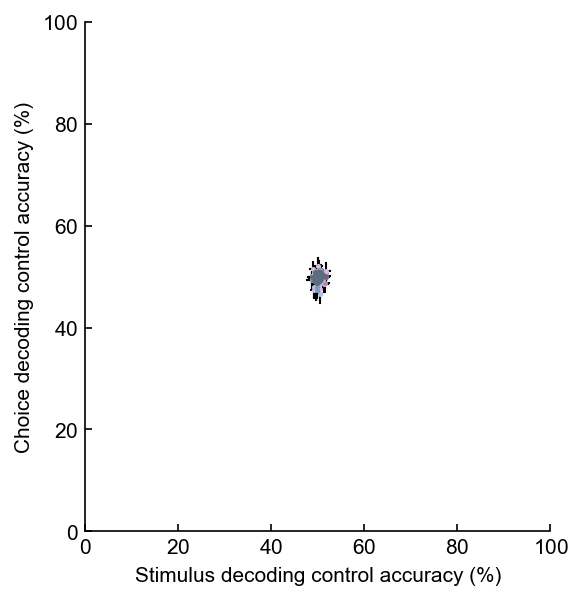

In [42]:
fig, ax = plt.subplots(figsize=(4,4.5))

stim_acc_list = [Stim_Dec_preearly,Stim_Dec_prelate,Stim_Dec_preexpert,Stim_Dec_postearly,Stim_Dec_postlate,Stim_Dec_postexpert]
choice_acc_list = [Choice_Dec_preearly,Choice_Dec_prelate,Choice_Dec_preexpert,Choice_Dec_postearly,Choice_Dec_postlate,Choice_Dec_postexpert]

stim_acc_list_sem = [Stim_Dec_preearly_sem,Stim_Dec_prelate_sem,Stim_Dec_preexpert_sem,Stim_Dec_postearly_sem,Stim_Dec_postlate_sem,Stim_Dec_postexpert_sem]
choice_acc_list_sem = [Choice_Dec_preearly_sem,Choice_Dec_prelate_sem,Choice_Dec_preexpert_sem,Choice_Dec_postearly_sem,Choice_Dec_postlate_sem,Choice_Dec_postexpert_sem]

for phase_idx,(stim_dec,choice_dec,stim_dec_sem,choice_dec_sem) in enumerate(zip(stim_acc_list,choice_acc_list,stim_acc_list_sem,choice_acc_list_sem)):
    ax.scatter([stim_dec*100],choice_dec*100,color=PHASE_COLORS[phase_idx],s=2)
    ax.plot([stim_dec*100-stim_dec_sem*100,stim_dec*100+stim_dec_sem*100],[choice_dec*100]*2,color='k',lw=1,zorder=-10)
    ax.plot([stim_dec*100]*2,[choice_dec*100-choice_dec_sem*100,choice_dec*100+choice_dec_sem*100],color='k',lw=1,zorder=-10)

ax.set_xlim([0,100])
ax.set_xlabel('Stimulus decoding control accuracy (%)')

ax.set_ylim([0,100])
ax.set_ylabel('Choice decoding control accuracy (%)')

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Decoding Controls V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

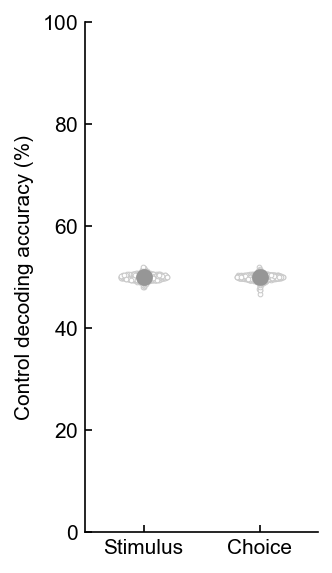

In [72]:
fig, ax = plt.subplots(figsize=(2,4.5))

stim_acc_list = [Stim_Dec_preearly,Stim_Dec_prelate,Stim_Dec_preexpert,Stim_Dec_postearly,Stim_Dec_postlate,Stim_Dec_postexpert]
choice_acc_list = [Choice_Dec_preearly,Choice_Dec_prelate,Choice_Dec_preexpert,Choice_Dec_postearly,Choice_Dec_postlate,Choice_Dec_postexpert]
stim_acc_list_sem = [Stim_Dec_preearly_sem,Stim_Dec_prelate_sem,Stim_Dec_preexpert_sem,Stim_Dec_postearly_sem,Stim_Dec_postlate_sem,Stim_Dec_postexpert_sem]
choice_acc_list_sem = [Choice_Dec_preearly_sem,Choice_Dec_prelate_sem,Choice_Dec_preexpert_sem,Choice_Dec_postearly_sem,Choice_Dec_postlate_sem,Choice_Dec_postexpert_sem]

for phase_idx,(stim_dec,choice_dec,stim_dec_sem,choice_dec_sem) in enumerate(zip(stim_acc_list,choice_acc_list,stim_acc_list_sem,choice_acc_list_sem)):
    X,Y = ilep.violin(stim_dec*100,width=0.5)
    ax.scatter(X,Y,fc='white',ec=GOOD_GREY,s=5,lw=0.5,zorder=-10)
    
    X,Y = ilep.violin(choice_dec*100,width=0.5)
    ax.scatter(X+1,Y,fc='white',ec=GOOD_GREY,s=5,lw=0.5,zorder=-10)

summary_size=50
summary_width=1
#Summary
stim_acc = np.concatenate(stim_acc_list)
Q1, median, Q3 = (np.nanpercentile(stim_acc, q)*100 for q in [25, 50, 75])
ax.scatter([0], [median], ec=GOOD_GREY,fc=GOOD_GREY, s=summary_size,lw=summary_width, zorder=10)
ax.plot([0,0], [Q1, Q3], c=GOOD_GREY, lw=summary_width, zorder=11, solid_capstyle='round')
#Summary
choice_acc = np.concatenate(choice_acc_list)
Q1, median, Q3 = (np.nanpercentile(choice_acc, q)*100 for q in [25, 50, 75])
ax.scatter([1], [median], ec=GOOD_GREY,fc=GOOD_GREY, s=summary_size,lw=summary_width, zorder=10)
ax.plot([1,1], [Q1, Q3], c=GOOD_GREY, lw=summary_width, zorder=11, solid_capstyle='round')
    
ax.set_xlim([-0.5,1.5])
ax.set_xticks([0,1])
ax.set_xticklabels(['Stimulus','Choice'])

ax.set_ylim([0,100])
lab = ax.set_ylabel('Control decoding accuracy (%)')

ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Decoding Controls V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=([lab]), bbox_inches='tight')

In [21]:
sessionfile = ilep.loadSessionCached(act_directory,'BS_87_11_AC.pickle')
clust = 10

conds = ilep.getAllConditions(sessionfile,clust)
print(conds['all_trials'].trials)
print(conds['target'].trials)
print(conds['nontarget'].trials)

[300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316]
[300 301 302 303 304 305 306 307 309 310 311 316]
[308 312 313 314 315]


In [13]:
1884+1584+1259

4727

In [14]:
3081+3342+1541

7964